In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
path_demand = "/content/drive/MyDrive/Colab Notebooks/Comapny Assessment/Home.LLC/demand.csv"
path_supply = "/content/drive/MyDrive/Colab Notebooks/Comapny Assessment/Home.LLC/supply.csv"

In [4]:
demand = pd.read_csv(path_demand)
supply = pd.read_csv(path_supply)

In [8]:
# Merging Data
df = supply.merge(demand, on = 'DATE')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            81 non-null     object 
 1   CSUSHPISA_x     81 non-null     object 
 2   MSACSR          81 non-null     object 
 3   PERMIT          81 non-null     object 
 4   TLRESCONS       81 non-null     object 
 5   EVACANTUSQ176N  81 non-null     object 
 6   CSUSHPISA_y     80 non-null     float64
 7   MORTGAGE30US    81 non-null     float64
 8   UMCSENT         81 non-null     float64
 9   INTDSRUSM193N   74 non-null     float64
 10  MSPUS           81 non-null     int64  
 11  GDP             81 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 8.2+ KB


In [9]:
# Arrange Data
df.rename(columns={'CSUSHPISA_x':'Home_price_index', 'MSACSR':'Monthly_supply', 'PERMIT':'Permit', 'TLRESCONS':'Total_construction_spending', 'EVACANTUSQ176N':'Housing_inventory'\
                   , 'MORTGAGE30US':'30y_mortgage', 'UMCSENT':'Consumer_sentiment', 'INTDSRUSM193N':'Interest_rates', 'MSPUS':'Median_sales_price', 'DATE':'Date'},inplace=True)

In [11]:
df.drop(columns=['CSUSHPISA_y'],inplace=True)

In [12]:
df.head()

,Date,Home_price_index,Monthly_supply,Permit,Total_construction_spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [18]:
df.shape

(81, 11)

In [13]:
# Process Data

In [24]:
# Find and Remove the missing values
df.dropna(inplace=True)

In [30]:
# Set the date formate
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
df.head()

,Date,Home_price_index,Monthly_supply,Permit,Total_construction_spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [32]:
df.dtypes

Date                           datetime64[ns]
Home_price_index                       object
Monthly_supply                         object
Permit                                 object
Total_construction_spending            object
Housing_inventory                      object
30y_mortgage                          float64
Consumer_sentiment                    float64
Interest_rates                        float64
Median_sales_price                      int64
GDP                                   float64
dtype: object

In [36]:
columns_to_convert = [
    'Home_price_index',
    'Monthly_supply',
    'Permit',
    'Total_construction_spending',
    'Housing_inventory',
    '30y_mortgage',
    'Consumer_sentiment',
    'Interest_rates',
    'Median_sales_price',
    'GDP'
]

df[columns_to_convert] = df[columns_to_convert].astype(float).round(1)


In [37]:
df.head()

,Date,Home_price_index,Monthly_supply,Permit,Total_construction_spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.3,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,2003-01-04,131.8,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,2003-01-07,135.0,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,2003-01-10,138.8,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,2004-01-01,143.3,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4


In [51]:
# Set 'Date' column as the index
df.set_index('Date', inplace=True)

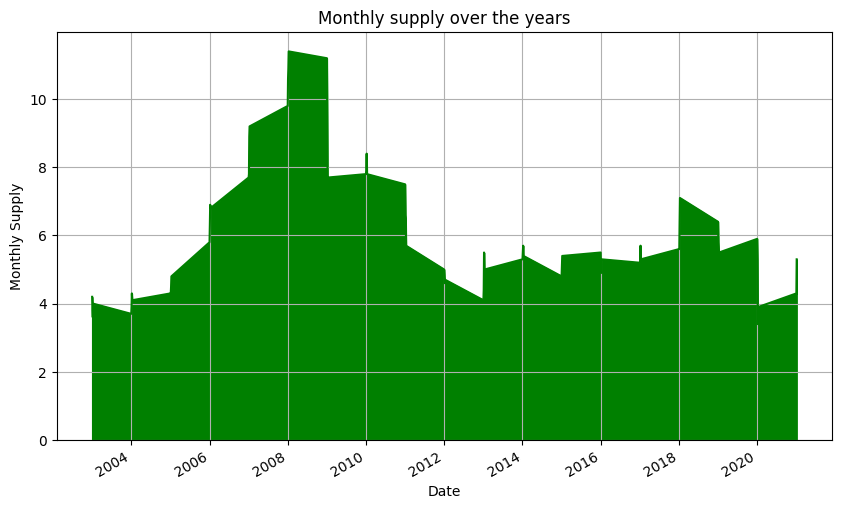

In [54]:
# Plot shows the monthly supply over the last 20 years
df['Monthly_supply'].plot(figsize=(10,6), color = 'green', kind = 'area')
plt.title('Monthly supply over the years')
plt.xlabel('Date')
plt.ylabel('Monthly Supply')
plt.grid(True)
plt.show()

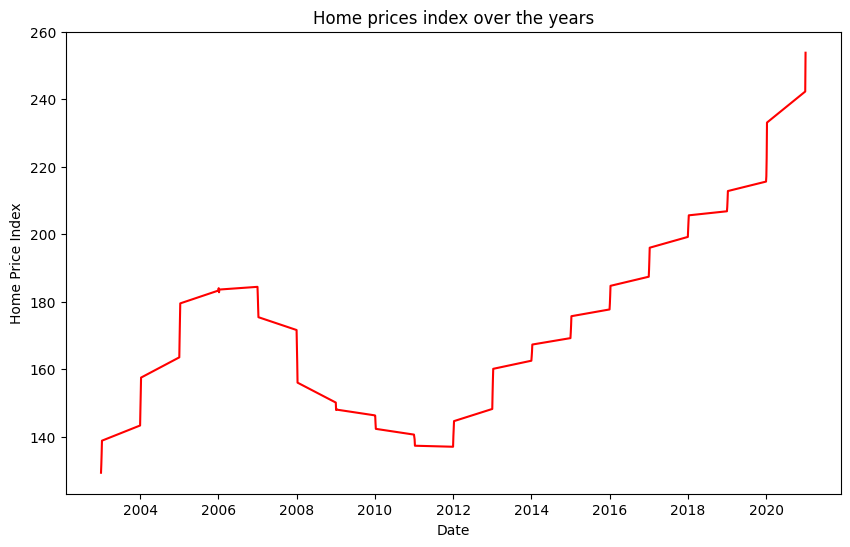

In [62]:
# Plot shows the home prices index over the last 20 years
plt.figure(figsize = (10,6))
plt.plot(df.index, df['Home_price_index'], color = 'red')
plt.title('Home prices index over the years')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.show()

[Text(0.5, 1.0, 'Permit over the years')]

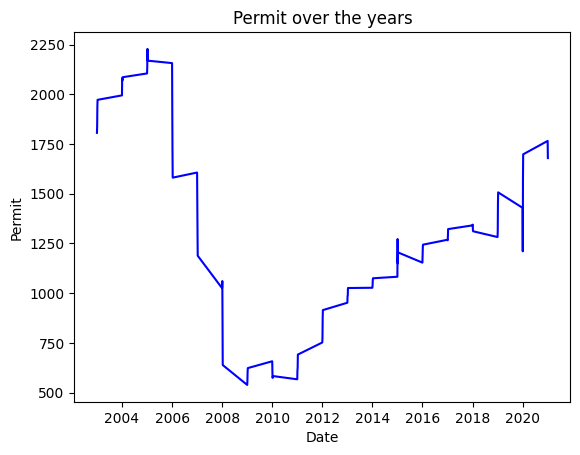

In [63]:
# Plot shows the permit over the last 20 years - using seaborn
sns.lineplot(data=df, x = 'Date', y = 'Permit', color = 'blue').set(title = 'Permit over the years')

[Text(0.5, 1.0, 'Total Construction Spending over the years'),
 Text(0, 0.5, 'Total construction spendiing')]

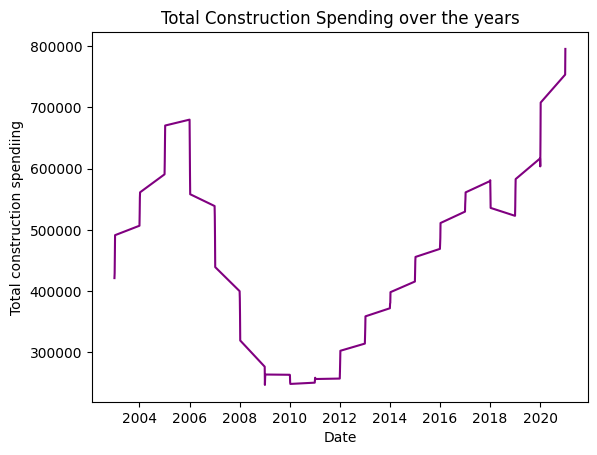

In [69]:
# Plot shows the total construction spending over the last 20 years - using seaborn
sns.lineplot(data = df, x = 'Date', y = 'Total_construction_spending', color = 'purple').set(title = 'Total Construction Spending over the years', ylabel = 'Total construction spendiing')

[Text(0.5, 1.0, 'GDP the last 20years')]

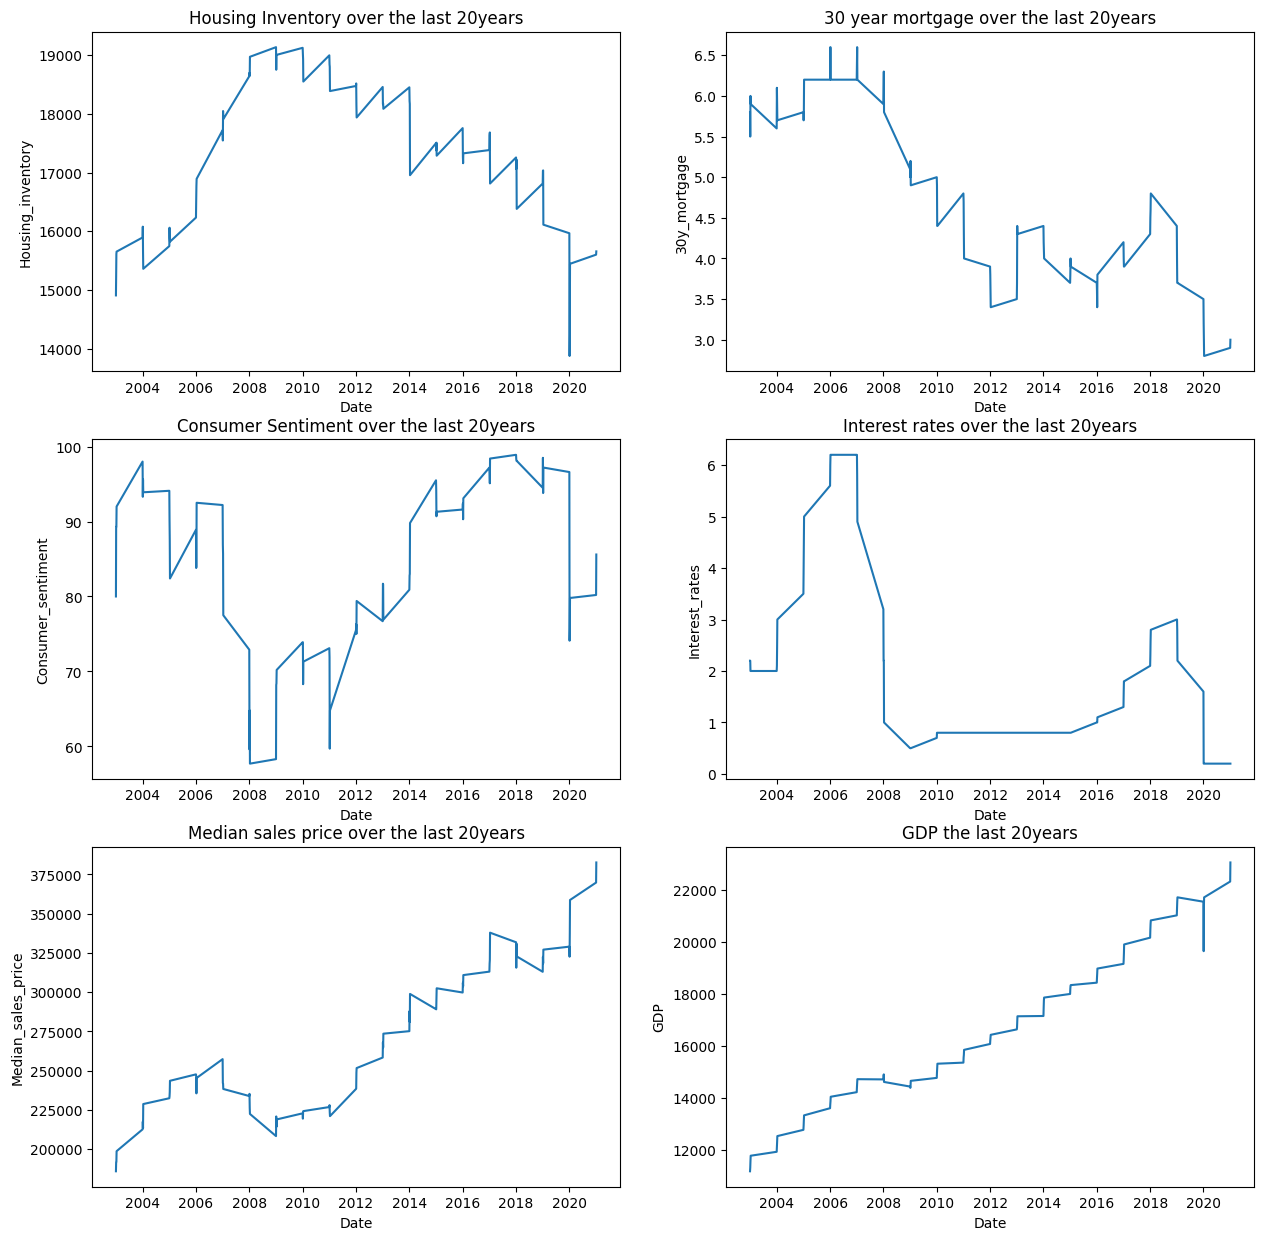

In [80]:
# Plotted rest of the data in single figure
figure, ax = plt.subplots(nrows=3, ncols=2, figsize = (15,15))

sns.lineplot(ax = ax[0,0], data = df, x = 'Date', y = 'Housing_inventory').set(title='Housing Inventory over the last 20years')
sns.lineplot(ax = ax[0,1], data = df, x = 'Date', y = '30y_mortgage').set(title='30 year mortgage over the last 20years')
sns.lineplot(ax = ax[1,0], data = df, x = 'Date', y = 'Consumer_sentiment').set(title='Consumer Sentiment over the last 20years')
sns.lineplot(ax = ax[1,1], data = df, x = 'Date', y = 'Interest_rates').set(title='Interest rates over the last 20years')
sns.lineplot(ax = ax[2,0], data = df, x = 'Date', y = 'Median_sales_price').set(title='Median sales price over the last 20years')
sns.lineplot(ax = ax[2,1], data = df, x = 'Date', y = 'GDP').set(title='GDP the last 20years')

[Text(0.5, 1.0, 'Correlation between factors that impacted the home prices ')]

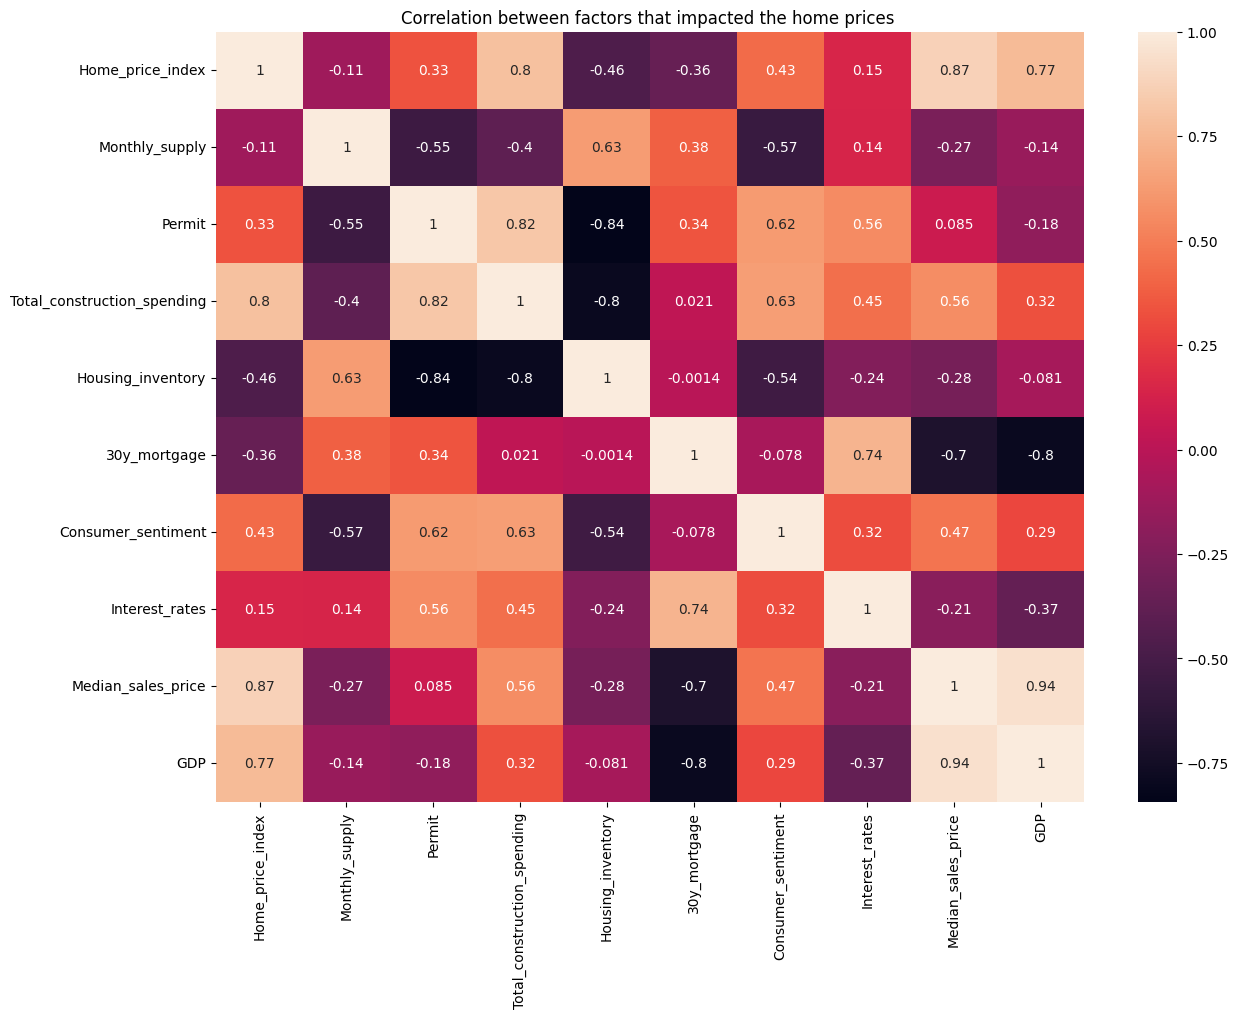

In [83]:
# Relation between the factors that impacted the home prices for last 20 years
correlation = df.corr()
plt.figure(figsize=(14,10))

sns.heatmap(data = correlation, annot = True). set(title = 'Correlation between factors that impacted the home prices ')

[Text(0.5, 1.0, 'Relationship between consumer sentiment and home price index')]

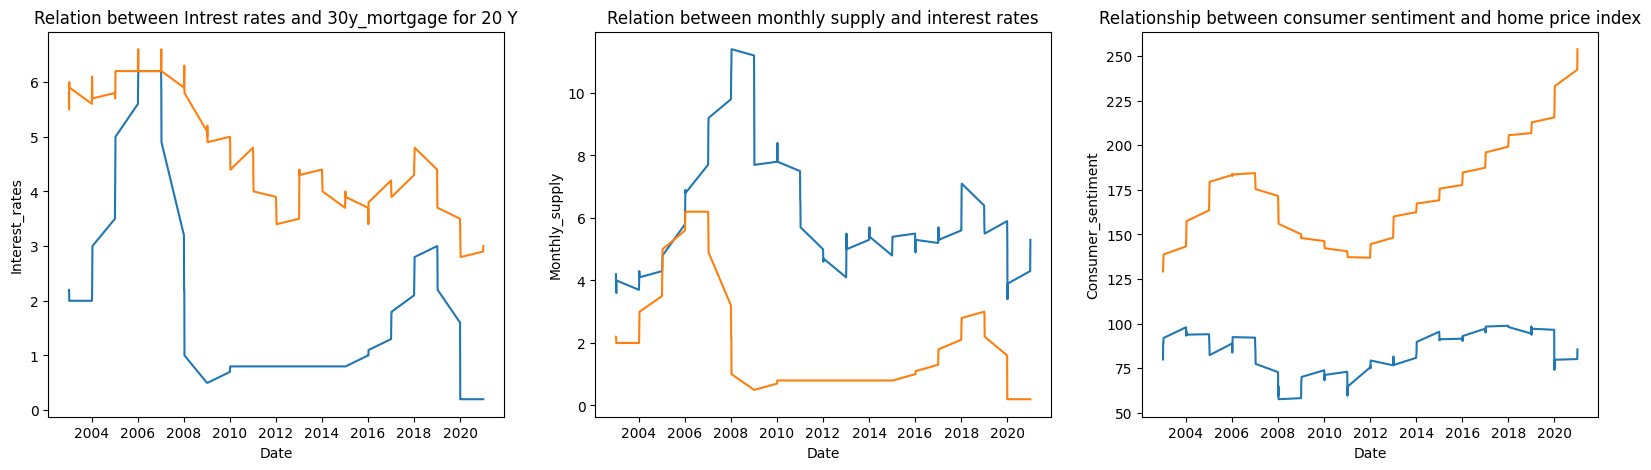

In [84]:
figure,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
sns.lineplot(ax = ax[0],data=df,x='Date',y='Interest_rates')
sns.lineplot(ax = ax[0],data=df,x='Date',y='30y_mortgage').set(title='Relation between Intrest rates and 30y_mortgage for 20 Y')

sns.lineplot(ax=ax[1],x = 'Date',y='Monthly_supply',data =df)
sns.lineplot(ax=ax[1],x = 'Date',y='Interest_rates',data =df).set(title='Relation between monthly supply and interest rates')

sns.lineplot(ax=ax[2],x = 'Date',y='Consumer_sentiment',data =df)
sns.lineplot(ax=ax[2],x = 'Date',y='Home_price_index',data =df).set(title='Relationship between consumer sentiment and home price index')